In [5]:
import os
import keras
import random
from keras.applications.inception_v3 import preprocess_input# 
from keras.preprocessing import image
from keras.models import load_model
from skimage.io import imread
from skimage.segmentation import mark_boundaries
from PIL import Image as PLIMG
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

timestamp = datetime.today().strftime("%d-%m-%Y %H%M")
print(timestamp)
print('Notebook run using keras:', keras.__version__)

27-03-2019 1254
Notebook run using keras: 2.2.4


In [6]:
data_type = 'cell_images'
#test_dir = os.path.join('data',data_type,'test')
#Malaria
test_dir = os.path.join('data','100TestImages','evaluate')
#test_dir = os.path.join('data','tabak_ma','test')

if data_type == "cell_images":
    img_size = 64
    CATEGORIES = ["Parasitized","Uninfected"]
elif data_type == "tabak":
    img_size = 224
    CATEGORIES = ["Gestresst","Gesund"]

#path_to_labels = os.path.join('labels', data_type+'.txt')
file_name = os.path.join('output',
                         data_type,
                         #'ResNet_270219_1439_tabak_loss0.1214')
                         'ResNet_valloss0.0859')
#file_name = "ResNet_test"

def getHighestID(preds):
    id = 0
    max = -1
    for i in range(len(preds)):
        if preds[i]>max:
            max = preds[i]
            id=i
    return id

def getLabels():
    return CATEGORIES

def getLabelById(id):
    return CATEGORIES[id]
    
def decode_prediction(preds):
    #label_list = getLabels()    
    decoded_list = list()
    #decoded_list.append([])
    for i in range(len(CATEGORIES)):
        #decoded_list[0].append([label_list[i],preds[i]])
        decoded_list.append([CATEGORIES[i],preds[i]])
    return decoded_list

def getIdByLabel(label):
    return CATEGORIES.index(label)

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(img_size, img_size))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

def getRandomImage(dir_path):
    dir_list = [x[0] for x in os.walk(test_dir)][1:]
    real_class = list()
    only_paths = list()
    for x in dir_list:
        y = os.path.join(x,random.choice(os.listdir(x)))
        real_class.append(os.path.basename(x))
        only_paths.append(y)
    return real_class, only_paths    

def getAllImagesOfPath(dir_path):
    #image_list = map(Image.open, glob(dir_path+'*.png'))
    image_list = []
    classes = list()
    for root, directories, filenames in os.walk(dir_path+"/"):
        for filename in filenames: 
            classes.append(root[root.rfind("/")+1:])
            image_list.append(os.path.join(root,filename))
    
    return classes, image_list

def getColorForWS(gradient, colored):
    fixedone = np.zeros(gradient.shape)
    gradient = gradient 
    colored = colored 
    for d in range (0,colored.shape[2]):
        for x in range(0,colored.shape[1]):
            for y in range(0,colored.shape[0]):
                if not gradient[x][y][d] == 0:
                    fixedone[x][y][d]=colored[x][y][d]
                else:
                    fixedone[x][y][d]=0
    return fixedone

def make_image(data, outputname, size=(1, 1), dpi=img_size):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('hot')
    ax.imshow(data, aspect='equal')
    plt.savefig(outputname, dpi=dpi)

In [7]:
my_model = load_model(file_name+".h5")
print('Model loaded> '+file_name)

Model loaded> output/cell_images/ResNet_valloss0.0859


In [8]:
#real_class, images_paths = getRandomImage(test_dir)
real_class, images_paths = getAllImagesOfPath(test_dir)

images = transform_img_fn(images_paths)
preds = my_model.predict(images)

<Figure size 432x288 with 0 Axes>

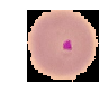

['Parasitized', 0.9980469]
['Uninfected', 0.0019530774]
True


<Figure size 432x288 with 0 Axes>

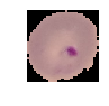

['Parasitized', 0.9999994]
['Uninfected', 5.458394e-07]
True


<Figure size 432x288 with 0 Axes>

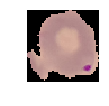

['Parasitized', 0.92525876]
['Uninfected', 0.074741215]
True


<Figure size 432x288 with 0 Axes>

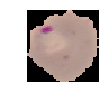

['Uninfected', 0.59035265]
['Parasitized', 0.40964738]
False


<Figure size 432x288 with 0 Axes>

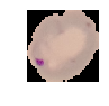

['Parasitized', 0.9998454]
['Uninfected', 0.00015459464]
True


<Figure size 432x288 with 0 Axes>

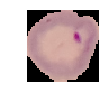

['Parasitized', 0.9486023]
['Uninfected', 0.05139769]
True


<Figure size 432x288 with 0 Axes>

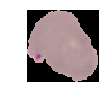

['Uninfected', 0.77464354]
['Parasitized', 0.22535647]
False


<Figure size 432x288 with 0 Axes>

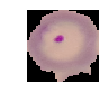

['Parasitized', 0.97064304]
['Uninfected', 0.029356968]
True


<Figure size 432x288 with 0 Axes>

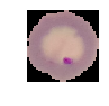

['Parasitized', 0.9853279]
['Uninfected', 0.014672027]
True


<Figure size 432x288 with 0 Axes>

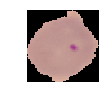

['Parasitized', 0.9991043]
['Uninfected', 0.0008956536]
True


<Figure size 432x288 with 0 Axes>

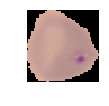

['Parasitized', 0.9809973]
['Uninfected', 0.019002683]
True


<Figure size 432x288 with 0 Axes>

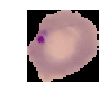

['Parasitized', 0.55524975]
['Uninfected', 0.4447502]
True


<Figure size 432x288 with 0 Axes>

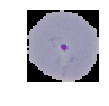

['Parasitized', 0.99999464]
['Uninfected', 5.3753665e-06]
True


<Figure size 432x288 with 0 Axes>

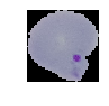

['Parasitized', 0.9889987]
['Uninfected', 0.011001342]
True


<Figure size 432x288 with 0 Axes>

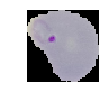

['Parasitized', 0.99997985]
['Uninfected', 2.009097e-05]
True


<Figure size 432x288 with 0 Axes>

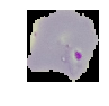

['Parasitized', 0.9932428]
['Uninfected', 0.006757185]
True


<Figure size 432x288 with 0 Axes>

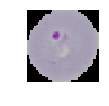

['Parasitized', 0.9995567]
['Uninfected', 0.00044328225]
True


<Figure size 432x288 with 0 Axes>

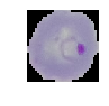

['Parasitized', 0.9392682]
['Uninfected', 0.0607318]
True


<Figure size 432x288 with 0 Axes>

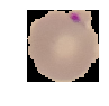

['Parasitized', 0.9785364]
['Uninfected', 0.021463573]
True


<Figure size 432x288 with 0 Axes>

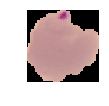

['Parasitized', 0.6781229]
['Uninfected', 0.3218771]
True


<Figure size 432x288 with 0 Axes>

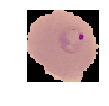

['Parasitized', 0.9992299]
['Uninfected', 0.00077005685]
True


<Figure size 432x288 with 0 Axes>

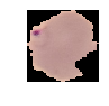

['Uninfected', 0.9623305]
['Parasitized', 0.037669547]
False


<Figure size 432x288 with 0 Axes>

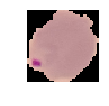

['Parasitized', 0.9758046]
['Uninfected', 0.024195392]
True


<Figure size 432x288 with 0 Axes>

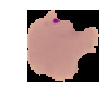

['Uninfected', 0.57903373]
['Parasitized', 0.42096627]
False


<Figure size 432x288 with 0 Axes>

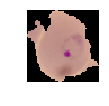

['Parasitized', 0.9936266]
['Uninfected', 0.006373432]
True


<Figure size 432x288 with 0 Axes>

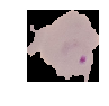

['Parasitized', 0.7787254]
['Uninfected', 0.22127463]
True


<Figure size 432x288 with 0 Axes>

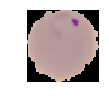

['Parasitized', 0.9148225]
['Uninfected', 0.085177466]
True


<Figure size 432x288 with 0 Axes>

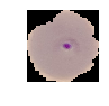

['Parasitized', 0.99970704]
['Uninfected', 0.00029296702]
True


<Figure size 432x288 with 0 Axes>

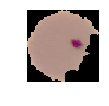

['Uninfected', 0.75876015]
['Parasitized', 0.24123986]
False


<Figure size 432x288 with 0 Axes>

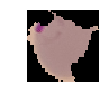

['Parasitized', 0.7106058]
['Uninfected', 0.28939414]
True


<Figure size 432x288 with 0 Axes>

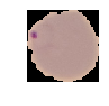

['Parasitized', 0.7991222]
['Uninfected', 0.20087783]
True


<Figure size 432x288 with 0 Axes>

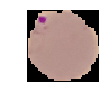

['Parasitized', 0.80947655]
['Uninfected', 0.19052345]
True


<Figure size 432x288 with 0 Axes>

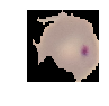

['Parasitized', 0.9935447]
['Uninfected', 0.006455365]
True


<Figure size 432x288 with 0 Axes>

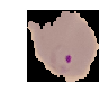

['Parasitized', 0.9955479]
['Uninfected', 0.0044521103]
True


<Figure size 432x288 with 0 Axes>

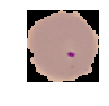

['Parasitized', 0.9999993]
['Uninfected', 7.6535827e-07]
True


<Figure size 432x288 with 0 Axes>

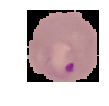

['Parasitized', 0.9999882]
['Uninfected', 1.17451045e-05]
True


<Figure size 432x288 with 0 Axes>

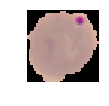

['Uninfected', 0.93494356]
['Parasitized', 0.06505648]
False


<Figure size 432x288 with 0 Axes>

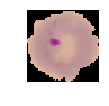

['Parasitized', 0.96637285]
['Uninfected', 0.0336272]
True


<Figure size 432x288 with 0 Axes>

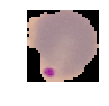

['Parasitized', 0.9997813]
['Uninfected', 0.00021868719]
True


<Figure size 432x288 with 0 Axes>

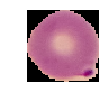

['Uninfected', 0.96714103]
['Parasitized', 0.032858945]
False


<Figure size 432x288 with 0 Axes>

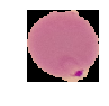

['Uninfected', 0.5428509]
['Parasitized', 0.45714906]
False


<Figure size 432x288 with 0 Axes>

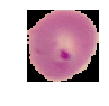

['Parasitized', 0.979448]
['Uninfected', 0.020551972]
True


<Figure size 432x288 with 0 Axes>

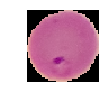

['Parasitized', 0.94667345]
['Uninfected', 0.05332656]
True


<Figure size 432x288 with 0 Axes>

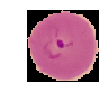

['Parasitized', 0.5266711]
['Uninfected', 0.4733289]
True


<Figure size 432x288 with 0 Axes>

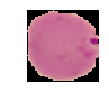

['Parasitized', 0.99821234]
['Uninfected', 0.0017877273]
True


<Figure size 432x288 with 0 Axes>

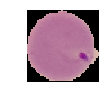

['Parasitized', 0.999527]
['Uninfected', 0.00047297816]
True


<Figure size 432x288 with 0 Axes>

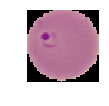

['Parasitized', 0.9997987]
['Uninfected', 0.00020128359]
True


<Figure size 432x288 with 0 Axes>

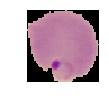

['Parasitized', 0.9995639]
['Uninfected', 0.00043610734]
True


<Figure size 432x288 with 0 Axes>

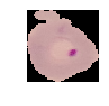

['Parasitized', 0.99991214]
['Uninfected', 8.7861365e-05]
True


<Figure size 432x288 with 0 Axes>

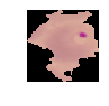

['Uninfected', 0.87910223]
['Parasitized', 0.12089778]
False


<Figure size 432x288 with 0 Axes>

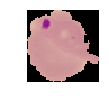

['Parasitized', 0.99957615]
['Uninfected', 0.00042383967]
True


<Figure size 432x288 with 0 Axes>

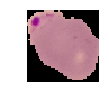

['Parasitized', 0.9996613]
['Uninfected', 0.0003386207]
True


<Figure size 432x288 with 0 Axes>

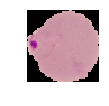

['Parasitized', 0.99952865]
['Uninfected', 0.00047137856]
True


<Figure size 432x288 with 0 Axes>

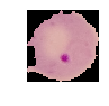

['Parasitized', 0.97666466]
['Uninfected', 0.023335287]
True


<Figure size 432x288 with 0 Axes>

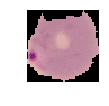

['Parasitized', 0.94693965]
['Uninfected', 0.05306038]
True


<Figure size 432x288 with 0 Axes>

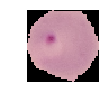

['Parasitized', 0.7463843]
['Uninfected', 0.25361568]
True


<Figure size 432x288 with 0 Axes>

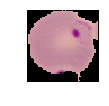

['Parasitized', 0.9977823]
['Uninfected', 0.0022177612]
True


<Figure size 432x288 with 0 Axes>

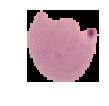

['Uninfected', 0.51938486]
['Parasitized', 0.48061517]
False


<Figure size 432x288 with 0 Axes>

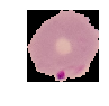

['Uninfected', 0.94492984]
['Parasitized', 0.05507015]
False


<Figure size 432x288 with 0 Axes>

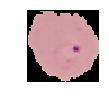

['Parasitized', 0.94214296]
['Uninfected', 0.057857078]
True


<Figure size 432x288 with 0 Axes>

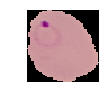

['Parasitized', 0.99137163]
['Uninfected', 0.008628329]
True


<Figure size 432x288 with 0 Axes>

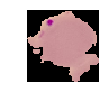

['Uninfected', 0.9516485]
['Parasitized', 0.04835156]
False


<Figure size 432x288 with 0 Axes>

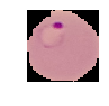

['Parasitized', 0.9900282]
['Uninfected', 0.009971842]
True


<Figure size 432x288 with 0 Axes>

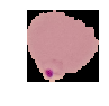

['Parasitized', 0.5456519]
['Uninfected', 0.4543481]
True


<Figure size 432x288 with 0 Axes>

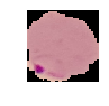

['Parasitized', 0.81576693]
['Uninfected', 0.18423304]
True


<Figure size 432x288 with 0 Axes>

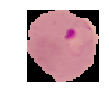

['Parasitized', 0.99988604]
['Uninfected', 0.000113988506]
True


<Figure size 432x288 with 0 Axes>

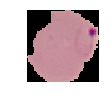

['Parasitized', 0.8180767]
['Uninfected', 0.18192324]
True


<Figure size 432x288 with 0 Axes>

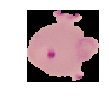

['Parasitized', 0.8752252]
['Uninfected', 0.12477482]
True


<Figure size 432x288 with 0 Axes>

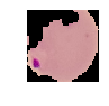

['Parasitized', 0.9998696]
['Uninfected', 0.00013041278]
True


<Figure size 432x288 with 0 Axes>

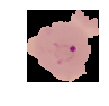

['Uninfected', 0.5986003]
['Parasitized', 0.4013997]
False


<Figure size 432x288 with 0 Axes>

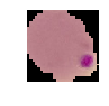

['Parasitized', 0.8845192]
['Uninfected', 0.11548076]
True


<Figure size 432x288 with 0 Axes>

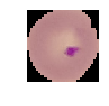

['Parasitized', 0.9999993]
['Uninfected', 7.1058537e-07]
True


<Figure size 432x288 with 0 Axes>

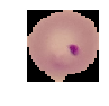

['Parasitized', 1.0]
['Uninfected', 3.1352037e-08]
True


<Figure size 432x288 with 0 Axes>

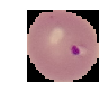

['Parasitized', 0.9986577]
['Uninfected', 0.0013423337]
True


<Figure size 432x288 with 0 Axes>

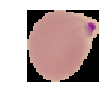

['Parasitized', 0.99708813]
['Uninfected', 0.0029119304]
True


<Figure size 432x288 with 0 Axes>

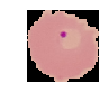

['Parasitized', 0.95727646]
['Uninfected', 0.042723477]
True


<Figure size 432x288 with 0 Axes>

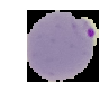

['Parasitized', 0.999801]
['Uninfected', 0.00019900012]
True


<Figure size 432x288 with 0 Axes>

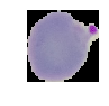

['Parasitized', 0.9947125]
['Uninfected', 0.005287537]
True


<Figure size 432x288 with 0 Axes>

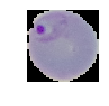

['Parasitized', 0.99998593]
['Uninfected', 1.4018943e-05]
True


<Figure size 432x288 with 0 Axes>

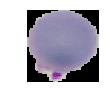

['Parasitized', 0.76595736]
['Uninfected', 0.23404264]
True


<Figure size 432x288 with 0 Axes>

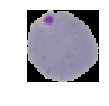

['Parasitized', 0.98512924]
['Uninfected', 0.014870788]
True


<Figure size 432x288 with 0 Axes>

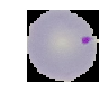

['Uninfected', 0.7596435]
['Parasitized', 0.24035645]
False


<Figure size 432x288 with 0 Axes>

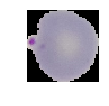

['Uninfected', 0.816606]
['Parasitized', 0.18339403]
False


<Figure size 432x288 with 0 Axes>

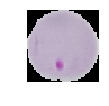

['Parasitized', 0.9999708]
['Uninfected', 2.9212502e-05]
True


<Figure size 432x288 with 0 Axes>

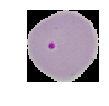

['Parasitized', 0.9998547]
['Uninfected', 0.00014524025]
True


<Figure size 432x288 with 0 Axes>

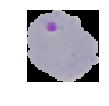

['Parasitized', 0.9881408]
['Uninfected', 0.011859182]
True


<Figure size 432x288 with 0 Axes>

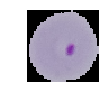

['Parasitized', 0.99999607]
['Uninfected', 3.981009e-06]
True


<Figure size 432x288 with 0 Axes>

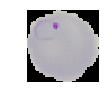

['Parasitized', 0.99341124]
['Uninfected', 0.0065887286]
True


<Figure size 432x288 with 0 Axes>

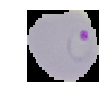

['Parasitized', 0.999998]
['Uninfected', 2.0601542e-06]
True


<Figure size 432x288 with 0 Axes>

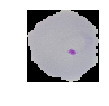

['Parasitized', 0.998038]
['Uninfected', 0.0019620303]
True


<Figure size 432x288 with 0 Axes>

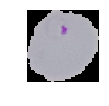

['Parasitized', 0.99538076]
['Uninfected', 0.004619224]
True


<Figure size 432x288 with 0 Axes>

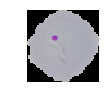

['Parasitized', 0.9998629]
['Uninfected', 0.00013712772]
True


<Figure size 432x288 with 0 Axes>

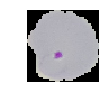

['Parasitized', 0.96406263]
['Uninfected', 0.035937358]
True


<Figure size 432x288 with 0 Axes>

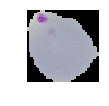

['Parasitized', 0.79069066]
['Uninfected', 0.20930937]
True


<Figure size 432x288 with 0 Axes>

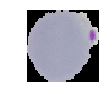

['Parasitized', 0.8559529]
['Uninfected', 0.14404713]
True


<Figure size 432x288 with 0 Axes>

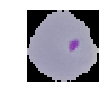

['Parasitized', 0.99999833]
['Uninfected', 1.6588215e-06]
True


<Figure size 432x288 with 0 Axes>

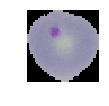

['Parasitized', 0.9946154]
['Uninfected', 0.005384634]
True


<Figure size 432x288 with 0 Axes>

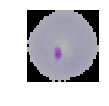

['Parasitized', 0.99999297]
['Uninfected', 7.0236765e-06]
True


<Figure size 432x288 with 0 Axes>

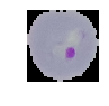

['Parasitized', 1.0]
['Uninfected', 7.650015e-12]
True


<Figure size 432x288 with 0 Axes>

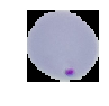

['Parasitized', 0.99982953]
['Uninfected', 0.00017042935]
True


In [9]:
image_names = list()
for i in range(len(images)):
    IMAGE_NAME = images_paths[i][images_paths[i].rfind("/")+1:].replace(".png","")
    image_names.append(IMAGE_NAME)
    if not os.path.exists('./data/lime_erg/'+data_type+'/'+timestamp+"/"+IMAGE_NAME):
        os.makedirs('./data/lime_erg/'+data_type+'/'+timestamp+"/"+IMAGE_NAME)
    
count_right = 0 
count_false = 0 
for i in range(len(images)):
    
    preds_with_labels = decode_prediction(preds[i])
    preds_with_labels = sorted(preds_with_labels,key=lambda l:l[1], reverse=True)   
    
    #print(IMAGE_NAME)
    file = open("data/lime_erg/{}/{}/{}/prediction".format(data_type,timestamp,image_names[i]),"a")
    file.write("pred {} real {}".format(getLabelById(getHighestID(preds[i])),real_class[i]))
    file.close()
    FILENAME =  "data/lime_erg/{}/{}/{}/{}.png".format(data_type,timestamp,image_names[i],"org") 
    #print(FILENAME)
    data = images[i]/2 +0.5
    
    plt.figure()    
    #plt.imshow(data)    
    make_image(data,FILENAME)    
    plt.show() 
    for x in preds_with_labels:
        print(x)        
    
    if preds_with_labels[0][0] == real_class[i]:
        count_right+= 1
        isright = True
    else:
        count_false += 1
        isright = False  
    #isright = True if  else False
    print(isright)
    preds_with_labels = []   

In [10]:
print(count_right)
print(count_false)
#85
#15

85
15


In [11]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image_changed
from skimage.color import gray2rgb
%reload_ext autoreload

In [12]:
explainer = lime_image_changed.LimeImageExplainer(feature_selection="highest_weights")
num_samples_to_learn = 1000
hide_rest_boolean = True
positive_only_boolean = True  
nb_features = 1
threshhold = 0
file = open("./data/lime_erg/"+data_type+"/"+timestamp+"/config","w+")
file.writelines("Number of samples: %d\n" %num_samples_to_learn)
file.writelines("hide rest: %r\n" %hide_rest_boolean)
file.writelines("positiv only: %r\n"%(positive_only_boolean))
file.writelines("Number of features: %d\n"%nb_features)
file.writelines("threshhold: %f\n"%threshhold)
file.close()


0.009293415993985631


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

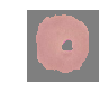

0.19836994008963507


<Figure size 432x288 with 0 Axes>

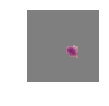

0.6055306701552428


<Figure size 432x288 with 0 Axes>

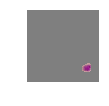

0.2116991582803564


<Figure size 432x288 with 0 Axes>

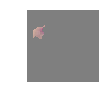

0.053461606647635995


<Figure size 432x288 with 0 Axes>

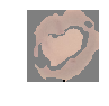

0.0011528118460436354


<Figure size 432x288 with 0 Axes>

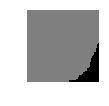

0.029752674492776528


<Figure size 432x288 with 0 Axes>

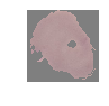

0.8225086428854222


<Figure size 432x288 with 0 Axes>

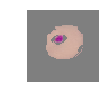

0.5082931517012743


<Figure size 432x288 with 0 Axes>

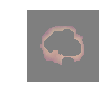

0.11783394440206339


<Figure size 432x288 with 0 Axes>

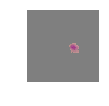

0.6799718360960294


<Figure size 432x288 with 0 Axes>

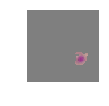

0.38709720640463546


<Figure size 432x288 with 0 Axes>

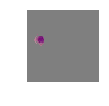

0.06911080204010767


<Figure size 432x288 with 0 Axes>

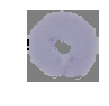

0.7578315681523613


<Figure size 432x288 with 0 Axes>

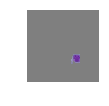

0.40437815552609885


<Figure size 432x288 with 0 Axes>

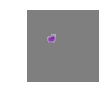

0.10010275309733214


<Figure size 432x288 with 0 Axes>

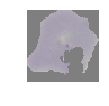

0.17140766872282634


<Figure size 432x288 with 0 Axes>

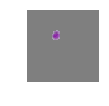

0.36400787124968254


<Figure size 432x288 with 0 Axes>

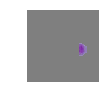

0.8200661299728973


<Figure size 432x288 with 0 Axes>

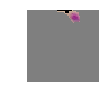

0.20140278397344025


<Figure size 432x288 with 0 Axes>

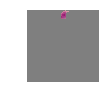

0.575386059882784


<Figure size 432x288 with 0 Axes>

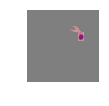

0.0024314120446199358


<Figure size 432x288 with 0 Axes>

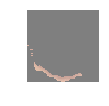

0.16098244681462945


<Figure size 432x288 with 0 Axes>

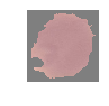

0.12340053117162395


<Figure size 432x288 with 0 Axes>

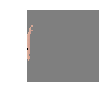

0.0645699134115479


<Figure size 432x288 with 0 Axes>

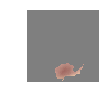

0.4640500481848477


<Figure size 432x288 with 0 Axes>

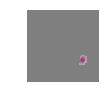

0.7230026779313783


<Figure size 432x288 with 0 Axes>

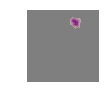

0.025515873997075857


<Figure size 432x288 with 0 Axes>

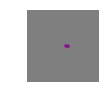

0.14252562427644672


<Figure size 432x288 with 0 Axes>

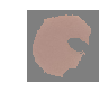

0.24514855110436742


<Figure size 432x288 with 0 Axes>

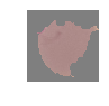

0.3257040834616253


<Figure size 432x288 with 0 Axes>

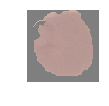

0.3976924325486462


<Figure size 432x288 with 0 Axes>

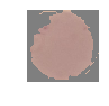

0.0469783362268938


<Figure size 432x288 with 0 Axes>

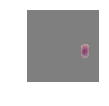

0.02514461560580924


<Figure size 432x288 with 0 Axes>

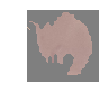

0.0318575320591726


<Figure size 432x288 with 0 Axes>

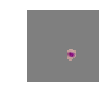

0.015508340470451978


<Figure size 432x288 with 0 Axes>

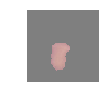

0.00608639980165542


<Figure size 432x288 with 0 Axes>

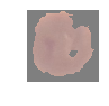

0.8691771328673475


<Figure size 432x288 with 0 Axes>

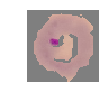

0.01636320717404441


<Figure size 432x288 with 0 Axes>

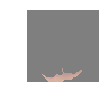

0.003044232797710538


<Figure size 432x288 with 0 Axes>

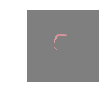

0.009924607040778544


<Figure size 432x288 with 0 Axes>

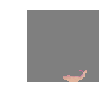

0.679997067050245


<Figure size 432x288 with 0 Axes>

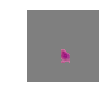

0.45563365143194684


<Figure size 432x288 with 0 Axes>

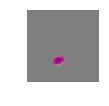

0.1542590492399808


<Figure size 432x288 with 0 Axes>

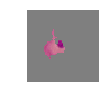

0.4477479285382397


<Figure size 432x288 with 0 Axes>

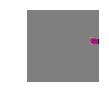

0.017117704932618535


<Figure size 432x288 with 0 Axes>

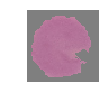

0.07262188404403734


<Figure size 432x288 with 0 Axes>

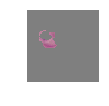

0.15365694665714505


<Figure size 432x288 with 0 Axes>

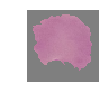

0.02280419758073365


<Figure size 432x288 with 0 Axes>

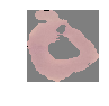

0.0002601223486739708


<Figure size 432x288 with 0 Axes>

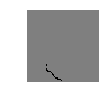

0.020033259928640437


<Figure size 432x288 with 0 Axes>

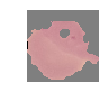

0.0308672322612725


<Figure size 432x288 with 0 Axes>

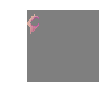

0.9219408468842892


<Figure size 432x288 with 0 Axes>

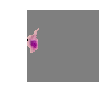

0.2591869561260059


<Figure size 432x288 with 0 Axes>

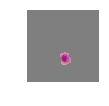

0.11842379592906065


<Figure size 432x288 with 0 Axes>

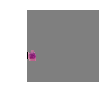

0.2835185123429845


<Figure size 432x288 with 0 Axes>

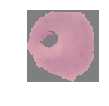

0.10472757750317854


<Figure size 432x288 with 0 Axes>

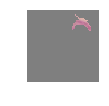

0.01008331951793319


<Figure size 432x288 with 0 Axes>

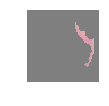

0.0005263687577424444


<Figure size 432x288 with 0 Axes>

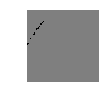

0.11793227665300496


<Figure size 432x288 with 0 Axes>

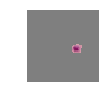

0.9284718716203668


<Figure size 432x288 with 0 Axes>

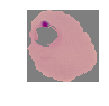

0.006808024906066549


<Figure size 432x288 with 0 Axes>

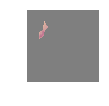

0.010166181678813575


<Figure size 432x288 with 0 Axes>

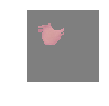

0.3534850778800876


<Figure size 432x288 with 0 Axes>

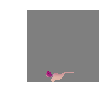

0.03926593084675838


<Figure size 432x288 with 0 Axes>

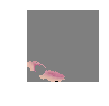

0.695980217975426


<Figure size 432x288 with 0 Axes>

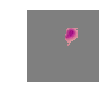

0.21465878784838144


<Figure size 432x288 with 0 Axes>

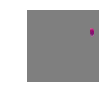

0.11832238728325922


<Figure size 432x288 with 0 Axes>

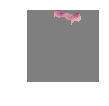

0.006413996337098453


<Figure size 432x288 with 0 Axes>

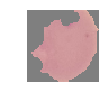

0.15521788435054815


<Figure size 432x288 with 0 Axes>

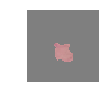

0.28753008086935744


<Figure size 432x288 with 0 Axes>

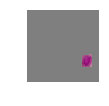

0.004204309597212326


<Figure size 432x288 with 0 Axes>

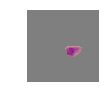

0.3169804450379796


<Figure size 432x288 with 0 Axes>

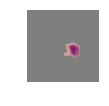

0.024786490499773394


<Figure size 432x288 with 0 Axes>

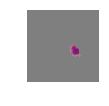

0.5322858476019885


<Figure size 432x288 with 0 Axes>

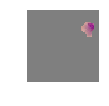

0.04571782415843712


<Figure size 432x288 with 0 Axes>

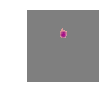

0.04129743741753907


<Figure size 432x288 with 0 Axes>

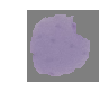

0.2720249823632379


<Figure size 432x288 with 0 Axes>

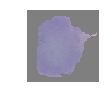

0.0029490155245100974


<Figure size 432x288 with 0 Axes>

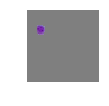

0.6621494382841471


<Figure size 432x288 with 0 Axes>

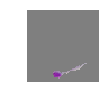

0.8116922928559956


<Figure size 432x288 with 0 Axes>

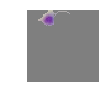

0.3045072730029396


<Figure size 432x288 with 0 Axes>

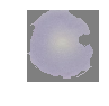

0.0033920803637235487


<Figure size 432x288 with 0 Axes>

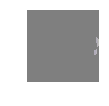

0.011090813858103385


<Figure size 432x288 with 0 Axes>

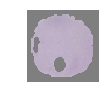

0.006610315866883121


<Figure size 432x288 with 0 Axes>

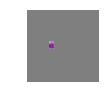

0.5017521682655615


<Figure size 432x288 with 0 Axes>

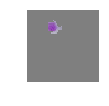

0.0007092761156668204


<Figure size 432x288 with 0 Axes>

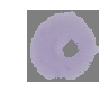

0.0763768405085878


<Figure size 432x288 with 0 Axes>

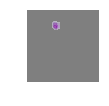

0.4764718900108435


<Figure size 432x288 with 0 Axes>

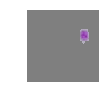

0.21446367141186806


<Figure size 432x288 with 0 Axes>

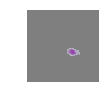

0.1869300013499804


<Figure size 432x288 with 0 Axes>

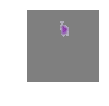

0.5229520070448913


<Figure size 432x288 with 0 Axes>

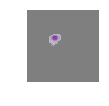

0.9450269716663661


<Figure size 432x288 with 0 Axes>

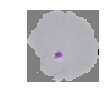

0.8200053893278981


<Figure size 432x288 with 0 Axes>

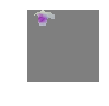

0.7273380385966169


<Figure size 432x288 with 0 Axes>

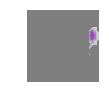

2.1326924633069524e-05


<Figure size 432x288 with 0 Axes>

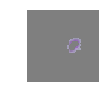

0.0044951321467335366


<Figure size 432x288 with 0 Axes>

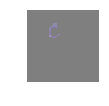

0.1409504058401581


<Figure size 432x288 with 0 Axes>

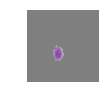

1.2572462679682391e-06


<Figure size 432x288 with 0 Axes>

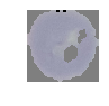

0.016622771800859904


<Figure size 432x288 with 0 Axes>

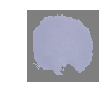

CPU times: user 3min 30s, sys: 3.86 s, total: 3min 33s
Wall time: 3min 4s


In [13]:
%%time
import warnings

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = list()
superpixel_fn ="felzenszwalb"
scale=200
sigma=0.5
min_size=30

file = open("./data/lime_erg/"+data_type+"/"+timestamp+"/config","a")

file.write("\n")
file.write("Name of super pixel function: %s\n" %superpixel_fn)
file.write("Scale: %d\n" %scale)
file.write("Sigma: %f\n"%sigma)
file.write("Minimal size: %d\n"%min_size)
file.close()


for image in images:
     explanation.append(explainer.explain_instance(image,
                                                  my_model.predict,
                                                  num_samples=num_samples_to_learn,
                                                  scale_v=scale,
                                                  sigma_v=sigma,
                                                  min_size_v=min_size,
                                                  segmentation_fn=superpixel_fn
                                                 ))

plt.clf()
#plt.figure()
for i in range(len(explanation)):
    label = getHighestID(preds[i])   
    max_value = 0
    for y in explanation[i].local_exp[label]:
        if y[1] > max_value:
            max_value=y[1]
    print(max_value)
    temp, mask = explanation[i].get_image_and_mask(label,
                                               positive_only=positive_only_boolean,
                                               hide_rest=hide_rest_boolean,
                                               min_weight=max_value*threshhold,
                                               num_features=nb_features)
    plt.figure(frameon=False)
    data = mark_boundaries(temp / 2 + 0.5, mask,color=(0.5,0.5,0.5))    
    FILENAME = "./data/lime_erg/{}/{}/{}/{}.png".format(data_type,timestamp,image_names[i],superpixel_fn)    
    make_image(data,FILENAME)
    plt.show()  

0.38319796179106574


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

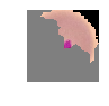

0.9036016745677116


<Figure size 432x288 with 0 Axes>

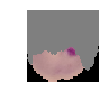

0.8379319987892879


<Figure size 432x288 with 0 Axes>

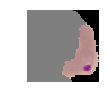

0.003962174205880992


<Figure size 432x288 with 0 Axes>

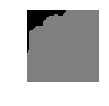

0.1427269977963964


<Figure size 432x288 with 0 Axes>

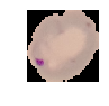

0.13940807435946748


<Figure size 432x288 with 0 Axes>

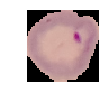

0


<Figure size 432x288 with 0 Axes>

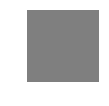

0.8869800917346606


<Figure size 432x288 with 0 Axes>

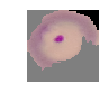

0.8716505542990206


<Figure size 432x288 with 0 Axes>

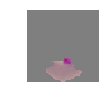

0.5408324261386511


<Figure size 432x288 with 0 Axes>

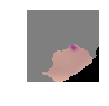

0.5151047537862048


<Figure size 432x288 with 0 Axes>

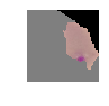

0.3484538238380421


<Figure size 432x288 with 0 Axes>

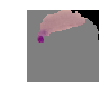

0.9018820066566327


<Figure size 432x288 with 0 Axes>

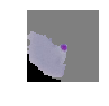

0.7695652596132556


<Figure size 432x288 with 0 Axes>

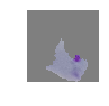

0.9665757534474273


<Figure size 432x288 with 0 Axes>

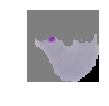

0.792505024340999


<Figure size 432x288 with 0 Axes>

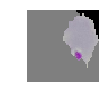

0.08754419606517692


<Figure size 432x288 with 0 Axes>

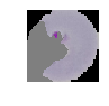

0.6427970380572124


<Figure size 432x288 with 0 Axes>

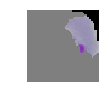

0.8089248343000893


<Figure size 432x288 with 0 Axes>

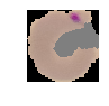

0.6412039538993406


<Figure size 432x288 with 0 Axes>

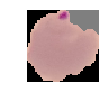

0.1425343264076062


<Figure size 432x288 with 0 Axes>

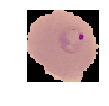

0.07417176512987171


<Figure size 432x288 with 0 Axes>

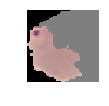

0.1376246810102275


<Figure size 432x288 with 0 Axes>

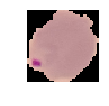

0.00045335278817402086


<Figure size 432x288 with 0 Axes>

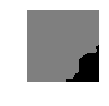

0.9462864525150866


<Figure size 432x288 with 0 Axes>

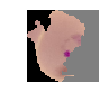

0.36300253035504937


<Figure size 432x288 with 0 Axes>

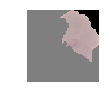

0.13268843691940854


<Figure size 432x288 with 0 Axes>

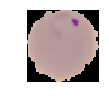

0.07503594631254513


<Figure size 432x288 with 0 Axes>

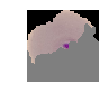

0.00021630869431118823


<Figure size 432x288 with 0 Axes>

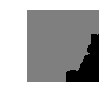

0.4354268729915969


<Figure size 432x288 with 0 Axes>

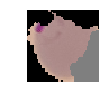

0.11264923991740321


<Figure size 432x288 with 0 Axes>

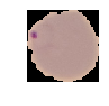

0.11246456928303486


<Figure size 432x288 with 0 Axes>

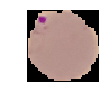

0.38600897022567626


<Figure size 432x288 with 0 Axes>

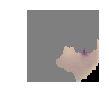

0.8261368082205499


<Figure size 432x288 with 0 Axes>

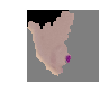

0.9660565517333204


<Figure size 432x288 with 0 Axes>

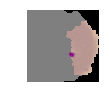

0.5204675147706372


<Figure size 432x288 with 0 Axes>

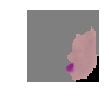

0.383412394271567


<Figure size 432x288 with 0 Axes>

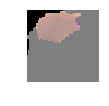

0.7947023867368869


<Figure size 432x288 with 0 Axes>

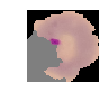

0.1245928140297506


<Figure size 432x288 with 0 Axes>

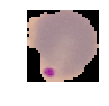

0.009578641883845072


<Figure size 432x288 with 0 Axes>

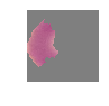

0.36221503934517285


<Figure size 432x288 with 0 Axes>

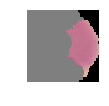

0.8917505293227829


<Figure size 432x288 with 0 Axes>

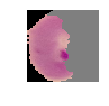

0.1425954399684122


<Figure size 432x288 with 0 Axes>

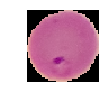

0.37319838544111317


<Figure size 432x288 with 0 Axes>

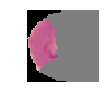

0.954142644338386


<Figure size 432x288 with 0 Axes>

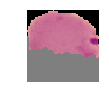

0.9543822218799473


<Figure size 432x288 with 0 Axes>

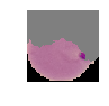

0.1386937605172453


<Figure size 432x288 with 0 Axes>

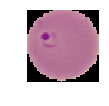

0.7428518913900988


<Figure size 432x288 with 0 Axes>

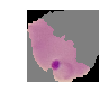

0.5760972683849067


<Figure size 432x288 with 0 Axes>

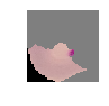

0.03183825203388261


<Figure size 432x288 with 0 Axes>

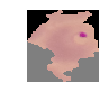

0.9020239526037973


<Figure size 432x288 with 0 Axes>

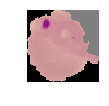

0.9678932569778566


<Figure size 432x288 with 0 Axes>

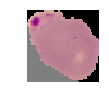

0.9685500040606362


<Figure size 432x288 with 0 Axes>

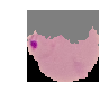

0.8057653070563424


<Figure size 432x288 with 0 Axes>

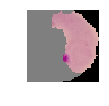

0.864168127104208


<Figure size 432x288 with 0 Axes>

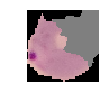

0.40537341867817417


<Figure size 432x288 with 0 Axes>

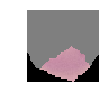

0.13211362925448195


<Figure size 432x288 with 0 Axes>

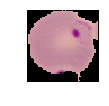

0


<Figure size 432x288 with 0 Axes>

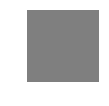

0.29655272064313903


<Figure size 432x288 with 0 Axes>

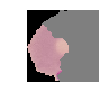

0.8330338629748439


<Figure size 432x288 with 0 Axes>

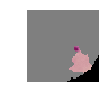

0.14003097131235606


<Figure size 432x288 with 0 Axes>

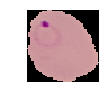

1.8115504731913483e-05


<Figure size 432x288 with 0 Axes>

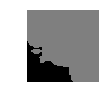

0.13957714728661144


<Figure size 432x288 with 0 Axes>

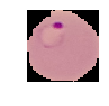

0.07587706960752903


<Figure size 432x288 with 0 Axes>

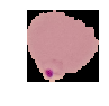

0.11711164860495028


<Figure size 432x288 with 0 Axes>

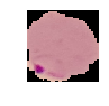

0.9616130361387989


<Figure size 432x288 with 0 Axes>

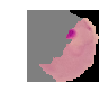

0.7020908100973072


<Figure size 432x288 with 0 Axes>

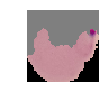

0.7439423080217006


<Figure size 432x288 with 0 Axes>

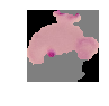

0.9239106973104637


<Figure size 432x288 with 0 Axes>

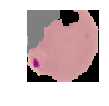

0.18567770452435653


<Figure size 432x288 with 0 Axes>

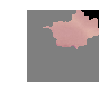

0.1243853791959786


<Figure size 432x288 with 0 Axes>

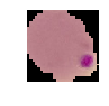

0.9407396388326624


<Figure size 432x288 with 0 Axes>

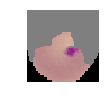

0.8997691963505087


<Figure size 432x288 with 0 Axes>

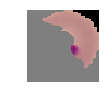

0.9472478416167015


<Figure size 432x288 with 0 Axes>

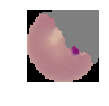

0.9816242777898765


<Figure size 432x288 with 0 Axes>

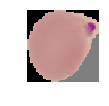

0.13258223487325488


<Figure size 432x288 with 0 Axes>

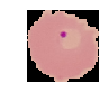

0.10235130677300848


<Figure size 432x288 with 0 Axes>

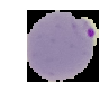

0.43751894532511326


<Figure size 432x288 with 0 Axes>

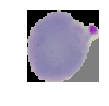

0.5291013549860325


<Figure size 432x288 with 0 Axes>

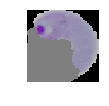

0.5497180859774622


<Figure size 432x288 with 0 Axes>

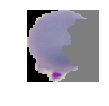

0.7480506828808908


<Figure size 432x288 with 0 Axes>

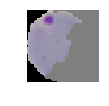

0.7485683894611714


<Figure size 432x288 with 0 Axes>

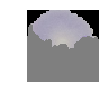

0.22748953022948634


<Figure size 432x288 with 0 Axes>

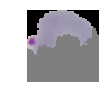

0.11198979567869062


<Figure size 432x288 with 0 Axes>

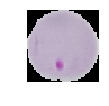

0.8582670594095262


<Figure size 432x288 with 0 Axes>

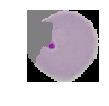

0.7523903061863645


<Figure size 432x288 with 0 Axes>

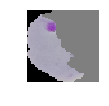

0.8174548834953888


<Figure size 432x288 with 0 Axes>

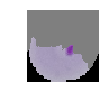

0.07731710188323832


<Figure size 432x288 with 0 Axes>

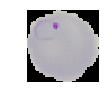

0.08875929145535899


<Figure size 432x288 with 0 Axes>

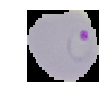

0.0834499422184006


<Figure size 432x288 with 0 Axes>

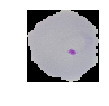

0.08453340971340635


<Figure size 432x288 with 0 Axes>

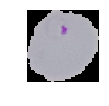

0.9706884157416283


<Figure size 432x288 with 0 Axes>

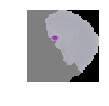

0.7640729878218203


<Figure size 432x288 with 0 Axes>

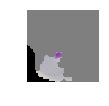

0.7398184966916116


<Figure size 432x288 with 0 Axes>

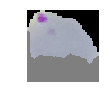

0.06282187269651351


<Figure size 432x288 with 0 Axes>

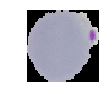

0.9120094637386165


<Figure size 432x288 with 0 Axes>

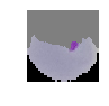

0.7850015823325057


<Figure size 432x288 with 0 Axes>

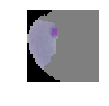

0.7237018022756492


<Figure size 432x288 with 0 Axes>

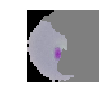

0.48771543773465537


<Figure size 432x288 with 0 Axes>

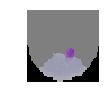

0.9792069784607211


<Figure size 432x288 with 0 Axes>

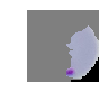

CPU times: user 3min 19s, sys: 3.7 s, total: 3min 23s
Wall time: 3min 6s


In [14]:
%%time
import warnings
warnings.filterwarnings('ignore')
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = list()
#felzenszwalb, slic, quickshift,watershed
superpixel_fn ="quickshift" 
kernel_size=4
max_dist=200
ratio=0.02

file = open('./data/lime_erg/'+data_type+'/'+timestamp+'/config',"a")
file.write("\n")
file.write("Name of super pixel function: %s\n" %superpixel_fn)
file.write("Kernel size: %d\n" %kernel_size)
file.write("Max distance: %d\n"%max_dist)
file.write("Ratio: %f\n"%ratio)
file.close()
for image in images:
    explanation.append(explainer.explain_instance(image,
                                                  my_model.predict,
                                                  num_samples=num_samples_to_learn,
                                                  #kernel_size_v=kernel_size,
                                                  #max_dist_v=max_dist,
                                                  #ratio_v=ratio,
                                                  segmentation_fn=superpixel_fn
                                                 ))


plt.clf()
#plt.figure()
for i in range(len(explanation)):
    label = getHighestID(preds[i])   
    max_value = 0
    for y in explanation[i].local_exp[label]:
        if y[1] > max_value:
            max_value=y[1]
    print(max_value)
    temp, mask = explanation[i].get_image_and_mask(label,
                                               positive_only=positive_only_boolean,
                                               hide_rest=hide_rest_boolean,
                                               min_weight=max_value*threshhold,
                                               num_features=nb_features)

    plt.figure(frameon=False)
    data = mark_boundaries(temp / 2 + 0.5, mask,color=(0.5,0.5,0.5))    
    FILENAME = "data/lime_erg/{}/{}/{}/{}.png".format(data_type,timestamp,image_names[i],superpixel_fn)  
    make_image(data,FILENAME) 
    plt.show() 

0.9304458009569667


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

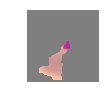

0.8098386837254593


<Figure size 432x288 with 0 Axes>

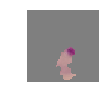

0.8009133517473401


<Figure size 432x288 with 0 Axes>

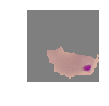

0.11608453872435352


<Figure size 432x288 with 0 Axes>

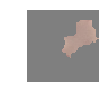

0.9243824214999646


<Figure size 432x288 with 0 Axes>

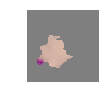

0.8469378553605713


<Figure size 432x288 with 0 Axes>

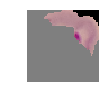

0.011868676428904596


<Figure size 432x288 with 0 Axes>

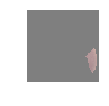

0.8028478014453782


<Figure size 432x288 with 0 Axes>

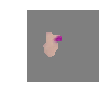

0.8830926233839607


<Figure size 432x288 with 0 Axes>

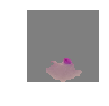

0.4777246848080873


<Figure size 432x288 with 0 Axes>

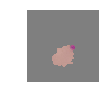

0.925954384593822


<Figure size 432x288 with 0 Axes>

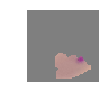

0.4038225184969069


<Figure size 432x288 with 0 Axes>

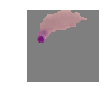

0.966549144360668


<Figure size 432x288 with 0 Axes>

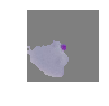

0.7672720685710238


<Figure size 432x288 with 0 Axes>

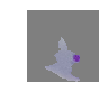

0.9734195931354483


<Figure size 432x288 with 0 Axes>

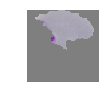

0.7712669459762155


<Figure size 432x288 with 0 Axes>

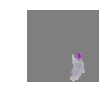

0.8727056775676351


<Figure size 432x288 with 0 Axes>

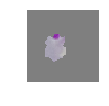

0.8992096968036791


<Figure size 432x288 with 0 Axes>

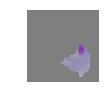

0.8413121366589612


<Figure size 432x288 with 0 Axes>

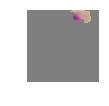

0.4666847070598518


<Figure size 432x288 with 0 Axes>

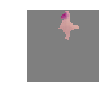

0.7984048249949774


<Figure size 432x288 with 0 Axes>

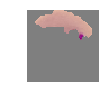

0.04569900624877801


<Figure size 432x288 with 0 Axes>

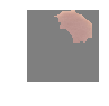

0.931736529765952


<Figure size 432x288 with 0 Axes>

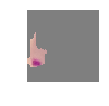

0.022680028205059023


<Figure size 432x288 with 0 Axes>

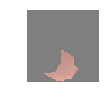

0.9178449555530506


<Figure size 432x288 with 0 Axes>

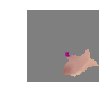

0.35950784795175444


<Figure size 432x288 with 0 Axes>

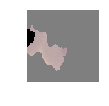

0.8291227680247798


<Figure size 432x288 with 0 Axes>

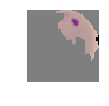

0.9257182202984051


<Figure size 432x288 with 0 Axes>

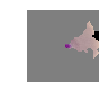

0.03806110972769966


<Figure size 432x288 with 0 Axes>

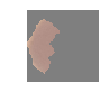

0.48490471574688326


<Figure size 432x288 with 0 Axes>

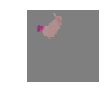

0.6767059955380936


<Figure size 432x288 with 0 Axes>

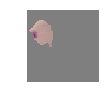

0.7389488944025056


<Figure size 432x288 with 0 Axes>

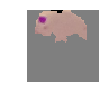

0.4014510190884351


<Figure size 432x288 with 0 Axes>

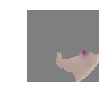

0.9528230212236132


<Figure size 432x288 with 0 Axes>

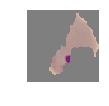

0.9427794743028559


<Figure size 432x288 with 0 Axes>

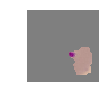

0.49390418008249914


<Figure size 432x288 with 0 Axes>

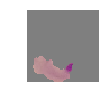

0.03258607839562752


<Figure size 432x288 with 0 Axes>

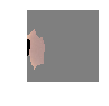

0.7587011379017315


<Figure size 432x288 with 0 Axes>

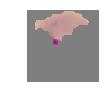

0.6905281907347113


<Figure size 432x288 with 0 Axes>

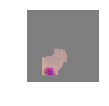

0.05064565528680206


<Figure size 432x288 with 0 Axes>

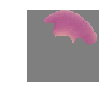

0.0047445286126963524


<Figure size 432x288 with 0 Axes>

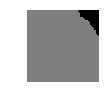

0.9023216509058486


<Figure size 432x288 with 0 Axes>

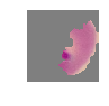

0.7363793941338554


<Figure size 432x288 with 0 Axes>

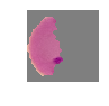

0.2950510059256488


<Figure size 432x288 with 0 Axes>

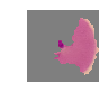

0.910017389643569


<Figure size 432x288 with 0 Axes>

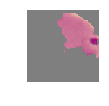

0.8830425843041173


<Figure size 432x288 with 0 Axes>

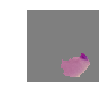

0.7466538433269966


<Figure size 432x288 with 0 Axes>

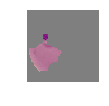

0.911943245199989


<Figure size 432x288 with 0 Axes>

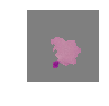

0.8964119380194543


<Figure size 432x288 with 0 Axes>

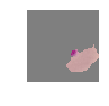

0.010156076777216139


<Figure size 432x288 with 0 Axes>

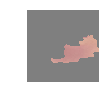

0.9491796125038453


<Figure size 432x288 with 0 Axes>

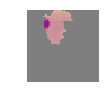

0.9735176342197543


<Figure size 432x288 with 0 Axes>

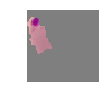

0.9627154922504734


<Figure size 432x288 with 0 Axes>

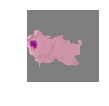

0.601510590497124


<Figure size 432x288 with 0 Axes>

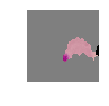

0.6123423672906655


<Figure size 432x288 with 0 Axes>

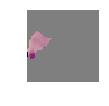

0.4814830186268092


<Figure size 432x288 with 0 Axes>

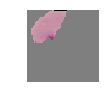

0.8982597271372612


<Figure size 432x288 with 0 Axes>

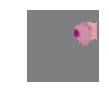

0.02997538816020401


<Figure size 432x288 with 0 Axes>

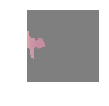

0.032933281760289604


<Figure size 432x288 with 0 Axes>

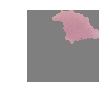

0.446977883544209


<Figure size 432x288 with 0 Axes>

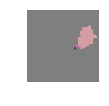

0.7897635813102967


<Figure size 432x288 with 0 Axes>

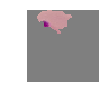

0.03740945490702482


<Figure size 432x288 with 0 Axes>

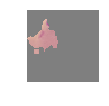

0.4327146593011126


<Figure size 432x288 with 0 Axes>

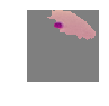

0.2537343282982108


<Figure size 432x288 with 0 Axes>

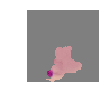

0.7236364968322923


<Figure size 432x288 with 0 Axes>

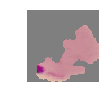

0.8698459021894714


<Figure size 432x288 with 0 Axes>

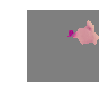

0.7322172342038865


<Figure size 432x288 with 0 Axes>

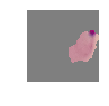

0.6778197701702581


<Figure size 432x288 with 0 Axes>

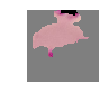

0.6514494374010451


<Figure size 432x288 with 0 Axes>

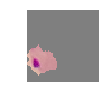

0.23683491350985791


<Figure size 432x288 with 0 Axes>

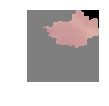

0.5424301215543647


<Figure size 432x288 with 0 Axes>

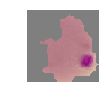

0.5381178468757079


<Figure size 432x288 with 0 Axes>

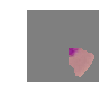

0.8367353165066871


<Figure size 432x288 with 0 Axes>

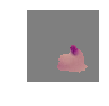

0.7511180395579642


<Figure size 432x288 with 0 Axes>

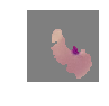

0.9467210453630681


<Figure size 432x288 with 0 Axes>

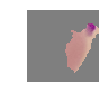

0.9194742385316131


<Figure size 432x288 with 0 Axes>

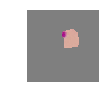

0.7939944622084507


<Figure size 432x288 with 0 Axes>

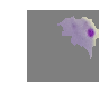

0.9269195761735911


<Figure size 432x288 with 0 Axes>

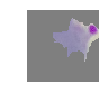

0.8056922609872265


<Figure size 432x288 with 0 Axes>

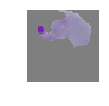

0.7753418948930766


<Figure size 432x288 with 0 Axes>

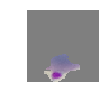

0.8990915957240487


<Figure size 432x288 with 0 Axes>

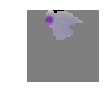

0.05602425398148137


<Figure size 432x288 with 0 Axes>

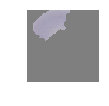

0.0037573706427363714


<Figure size 432x288 with 0 Axes>

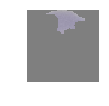

0.9665444835440847


<Figure size 432x288 with 0 Axes>

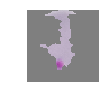

0.8463930826285504


<Figure size 432x288 with 0 Axes>

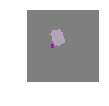

0.8340009534751871


<Figure size 432x288 with 0 Axes>

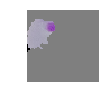

0.6014486182740459


<Figure size 432x288 with 0 Axes>

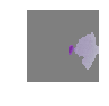

0.8257027695792368


<Figure size 432x288 with 0 Axes>

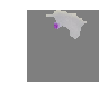

0.9041360789714772


<Figure size 432x288 with 0 Axes>

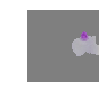

0.9441147621008374


<Figure size 432x288 with 0 Axes>

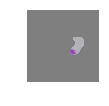

0.7026891191175618


<Figure size 432x288 with 0 Axes>

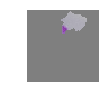

0.903707907836571


<Figure size 432x288 with 0 Axes>

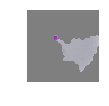

0.6737268728402591


<Figure size 432x288 with 0 Axes>

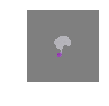

0.8347475726731741


<Figure size 432x288 with 0 Axes>

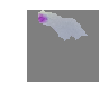

0.7737819100732449


<Figure size 432x288 with 0 Axes>

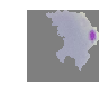

0.8621746889337082


<Figure size 432x288 with 0 Axes>

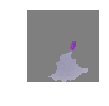

0.9139729897940949


<Figure size 432x288 with 0 Axes>

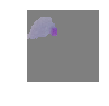

0.9127498244703186


<Figure size 432x288 with 0 Axes>

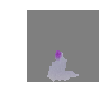

0.6765340023885331


<Figure size 432x288 with 0 Axes>

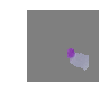

0.86364485157105


<Figure size 432x288 with 0 Axes>

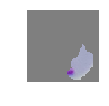

CPU times: user 3min 36s, sys: 3.55 s, total: 3min 40s
Wall time: 3min 6s


In [15]:
%%time
import warnings
warnings.filterwarnings('ignore')
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = list()
#
#OPTIMIZED QUICKSHIFT
#
#felzenszwalb, slic, quickshift,watershed
superpixel_fn ="quickshift" 
kernel_size=2
max_dist=30
ratio=0.1

file = open('./data/lime_erg/'+data_type+'/'+timestamp+'/config',"a")
file.write("\n")
file.write("Name of super pixel function: %s optimized\n" %superpixel_fn)
file.write("Kernel size: %d\n" %kernel_size)
file.write("Max distance: %d\n"%max_dist)
file.write("Ratio: %f\n"%ratio)
file.close()
for image in images:
    explanation.append(explainer.explain_instance(image,
                                                  my_model.predict,
                                                  num_samples=num_samples_to_learn,
                                                  kernel_size_v=kernel_size,
                                                  max_dist_v=max_dist,
                                                  ratio_v=ratio,
                                                  segmentation_fn=superpixel_fn
                                                 ))


plt.clf()
#plt.figure()
for i in range(len(explanation)):
    label = getHighestID(preds[i])   
    max_value = 0
    for y in explanation[i].local_exp[label]:
        if y[1] > max_value:
            max_value=y[1]
    print(max_value)
    temp, mask = explanation[i].get_image_and_mask(label,
                                               positive_only=positive_only_boolean,
                                               hide_rest=hide_rest_boolean,
                                               min_weight=max_value*threshhold,
                                               num_features=nb_features)

    plt.figure(frameon=False)
    data = mark_boundaries(temp / 2 + 0.5, mask,color=(0.5,0.5,0.5))    
    FILENAME = "data/lime_erg/{}/{}/{}/{}optimized.png".format(data_type,timestamp,image_names[i],superpixel_fn)  
    make_image(data,FILENAME) 
    plt.show() 

0.005040469204587437


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

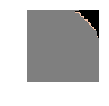

0.00032303570517692564


<Figure size 432x288 with 0 Axes>

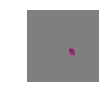

0.8275179202961952


<Figure size 432x288 with 0 Axes>

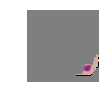

0.16036342924976849


<Figure size 432x288 with 0 Axes>

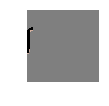

0.391268244742721


<Figure size 432x288 with 0 Axes>

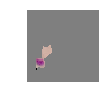

0.8409077371125742


<Figure size 432x288 with 0 Axes>

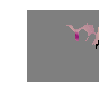

0.19201402238650783


<Figure size 432x288 with 0 Axes>

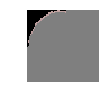

0.7518623157257198


<Figure size 432x288 with 0 Axes>

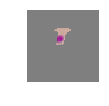

0.8524141281455451


<Figure size 432x288 with 0 Axes>

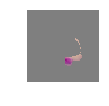

0.05788540254351864


<Figure size 432x288 with 0 Axes>

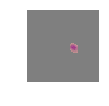

0.5948033547803945


<Figure size 432x288 with 0 Axes>

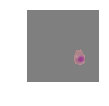

0.35519348413562174


<Figure size 432x288 with 0 Axes>

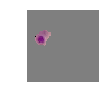

0.2618924391263229


<Figure size 432x288 with 0 Axes>

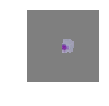

0.4262826853401879


<Figure size 432x288 with 0 Axes>

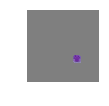

0.9405612063666735


<Figure size 432x288 with 0 Axes>

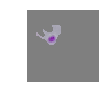

0.8737676679711481


<Figure size 432x288 with 0 Axes>

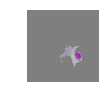

0.4611563663930072


<Figure size 432x288 with 0 Axes>

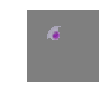

0.8608599941196298


<Figure size 432x288 with 0 Axes>

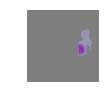

0.11508062848543503


<Figure size 432x288 with 0 Axes>

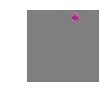

0.19255641683181657


<Figure size 432x288 with 0 Axes>

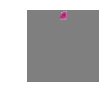

0.6951195280074749


<Figure size 432x288 with 0 Axes>

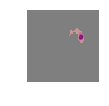

0.11852485818086843


<Figure size 432x288 with 0 Axes>

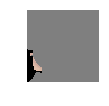

0.11674768029830795


<Figure size 432x288 with 0 Axes>

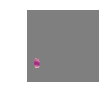

0.09318633848079565


<Figure size 432x288 with 0 Axes>

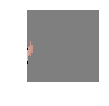

0.8469322125762265


<Figure size 432x288 with 0 Axes>

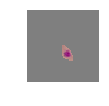

0.8018949396314679


<Figure size 432x288 with 0 Axes>

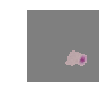

0.6327122893090328


<Figure size 432x288 with 0 Axes>

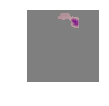

0.720868776713526


<Figure size 432x288 with 0 Axes>

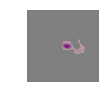

0.4002102552669944


<Figure size 432x288 with 0 Axes>

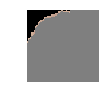

0.640516815296582


<Figure size 432x288 with 0 Axes>

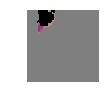

0.8624886403851232


<Figure size 432x288 with 0 Axes>

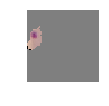

0.49125289345644996


<Figure size 432x288 with 0 Axes>

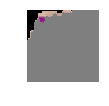

0.03537660322218224


<Figure size 432x288 with 0 Axes>

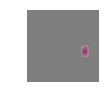

0.9363303507432993


<Figure size 432x288 with 0 Axes>

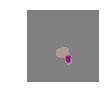

0.5207867759495198


<Figure size 432x288 with 0 Axes>

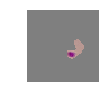

4.058570937434083e-05


<Figure size 432x288 with 0 Axes>

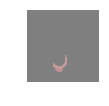

0.07570550527844841


<Figure size 432x288 with 0 Axes>

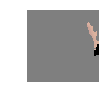

0.8274314869825135


<Figure size 432x288 with 0 Axes>

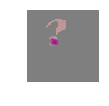

0.04291343323515882


<Figure size 432x288 with 0 Axes>

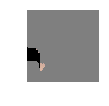

0.04558384235335729


<Figure size 432x288 with 0 Axes>

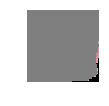

0.10672087839996224


<Figure size 432x288 with 0 Axes>

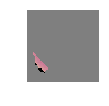

0.8542303639538145


<Figure size 432x288 with 0 Axes>

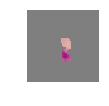

0.14789047811365963


<Figure size 432x288 with 0 Axes>

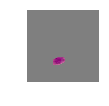

0.3115601708823518


<Figure size 432x288 with 0 Axes>

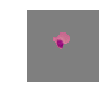

0.28499639715911473


<Figure size 432x288 with 0 Axes>

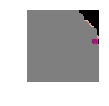

0.8828505408318704


<Figure size 432x288 with 0 Axes>

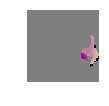

0.47147461506266436


<Figure size 432x288 with 0 Axes>

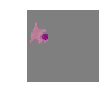

0.5911886028497272


<Figure size 432x288 with 0 Axes>

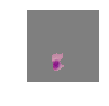

0.22276604318534202


<Figure size 432x288 with 0 Axes>

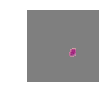

0.1713140371394183


<Figure size 432x288 with 0 Axes>

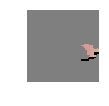

0.14360008726109544


<Figure size 432x288 with 0 Axes>

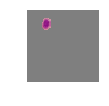

0.8566908517369731


<Figure size 432x288 with 0 Axes>

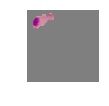

0.27406979638401996


<Figure size 432x288 with 0 Axes>

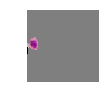

0.2761605046795815


<Figure size 432x288 with 0 Axes>

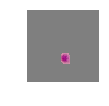

0.49979926039861455


<Figure size 432x288 with 0 Axes>

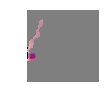

0.3875294084124858


<Figure size 432x288 with 0 Axes>

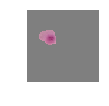

0.8777512050568194


<Figure size 432x288 with 0 Axes>

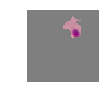

0.09536232274094718


<Figure size 432x288 with 0 Axes>

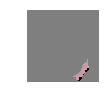

0.040287120130791935


<Figure size 432x288 with 0 Axes>

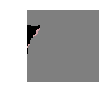

0.890166683941004


<Figure size 432x288 with 0 Axes>

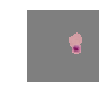

0.3351606138528074


<Figure size 432x288 with 0 Axes>

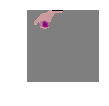

0.22873684683600412


<Figure size 432x288 with 0 Axes>

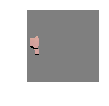

0.39706869604306483


<Figure size 432x288 with 0 Axes>

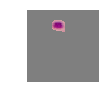

0.2730281703117522


<Figure size 432x288 with 0 Axes>

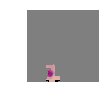

0.5340151972244696


<Figure size 432x288 with 0 Axes>

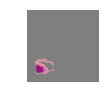

0.12688950865005316


<Figure size 432x288 with 0 Axes>

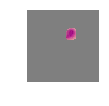

0.319871329604703


<Figure size 432x288 with 0 Axes>

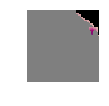

0.014442295694796471


<Figure size 432x288 with 0 Axes>

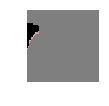

0.5171365664695735


<Figure size 432x288 with 0 Axes>

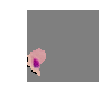

0.06471725574182084


<Figure size 432x288 with 0 Axes>

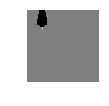

0.026573795927069845


<Figure size 432x288 with 0 Axes>

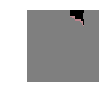

3.661355271392489e-05


<Figure size 432x288 with 0 Axes>

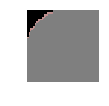

0.00308860488358748


<Figure size 432x288 with 0 Axes>

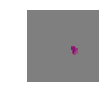

0.33612980743112286


<Figure size 432x288 with 0 Axes>

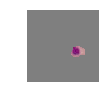

0.054743018398499294


<Figure size 432x288 with 0 Axes>

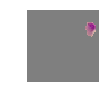

0.7366420364981352


<Figure size 432x288 with 0 Axes>

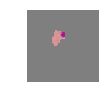

0.711391918008932


<Figure size 432x288 with 0 Axes>

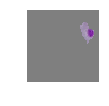

0.9022366157751404


<Figure size 432x288 with 0 Axes>

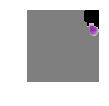

0.004598513744732197


<Figure size 432x288 with 0 Axes>

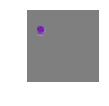

0.5227066654718456


<Figure size 432x288 with 0 Axes>

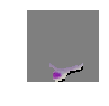

0.025285363417031848


<Figure size 432x288 with 0 Axes>

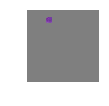

0.08808796640468997


<Figure size 432x288 with 0 Axes>

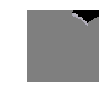

0.06535648308079935


<Figure size 432x288 with 0 Axes>

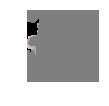

0.01202679939772548


<Figure size 432x288 with 0 Axes>

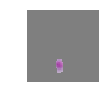

0.8559230712600446


<Figure size 432x288 with 0 Axes>

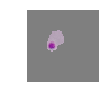

0.05708679231488268


<Figure size 432x288 with 0 Axes>

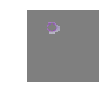

0.00019403170946835475


<Figure size 432x288 with 0 Axes>

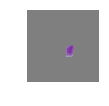

0.39136170524504


<Figure size 432x288 with 0 Axes>

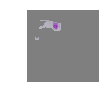

0.2445436788696


<Figure size 432x288 with 0 Axes>

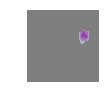

0.8572609688554398


<Figure size 432x288 with 0 Axes>

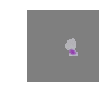

0.24421617883689012


<Figure size 432x288 with 0 Axes>

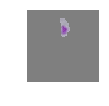

0.7016139034521337


<Figure size 432x288 with 0 Axes>

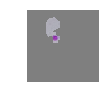

0.5821235185721076


<Figure size 432x288 with 0 Axes>

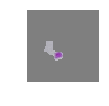

0.12229622092560472


<Figure size 432x288 with 0 Axes>

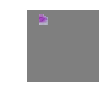

0.4946889730196417


<Figure size 432x288 with 0 Axes>

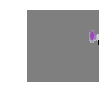

0.0002752558640636437


<Figure size 432x288 with 0 Axes>

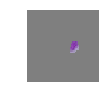

0.29851988403810753


<Figure size 432x288 with 0 Axes>

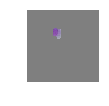

0.6168641383504894


<Figure size 432x288 with 0 Axes>

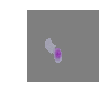

0.0020239052823013007


<Figure size 432x288 with 0 Axes>

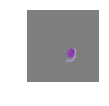

0.04775788078509545


<Figure size 432x288 with 0 Axes>

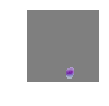

CPU times: user 3min 50s, sys: 3.71 s, total: 3min 54s
Wall time: 3min 22s


In [16]:
%%time
import warnings
#warnings.filterwarnings('ignore')
explanation = list()
#felzenszwalb, slic, quickshift,watershed
superpixel_fn ="slic"

numb_seg=60
compactness=3
sigma=1

file = open("./data/lime_erg/"+data_type+"/"+timestamp+"/config","a")

file.write("\n")
file.write("Name of super pixel function: %s\n" %superpixel_fn)
file.write("Number of segments: %d\n" %numb_seg)
file.write("Compactness: %d\n"%compactness)
file.write("Sigma: %d\n"%sigma)
file.close()


for image in images:
    explanation.append(explainer.explain_instance(image,
                                                  my_model.predict,
                                                  num_samples=num_samples_to_learn,
                                                  number_of_segments=numb_seg,
                                                  compactness_slic=compactness,
                                                  sigma_v=sigma,
                                                  segmentation_fn=superpixel_fn
                                                 ))


plt.clf()
for i in range(len(explanation)):
    label = getHighestID(preds[i])   
    max_value = 0
    for y in explanation[i].local_exp[label]:
        if y[1] > max_value:
            max_value=y[1]
    print(max_value)
    temp, mask = explanation[i].get_image_and_mask(label,
                                               positive_only=positive_only_boolean,
                                               hide_rest=hide_rest_boolean,
                                               min_weight=max_value*threshhold,
                                               num_features=nb_features)

    plt.figure(frameon=False)
    data = mark_boundaries(temp / 2 + 0.5, mask,color=(0.5,0.5,0.5))    
    FILENAME = "data/lime_erg/{}/{}/{}/{}.png".format(data_type,timestamp,image_names[i],superpixel_fn)   
    make_image(data,FILENAME)
    plt.show() 

0.044687080366100314


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

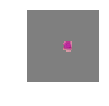

0.15938161888384716


<Figure size 432x288 with 0 Axes>

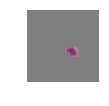

0.013610962441311186


<Figure size 432x288 with 0 Axes>

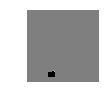

0.07725471266527599


<Figure size 432x288 with 0 Axes>

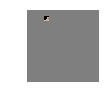

0.06769007084915304


<Figure size 432x288 with 0 Axes>

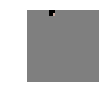

0.025097191980578373


<Figure size 432x288 with 0 Axes>

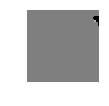

0.015584717300508531


<Figure size 432x288 with 0 Axes>

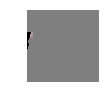

0.09139175192269514


<Figure size 432x288 with 0 Axes>

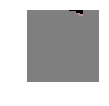

0.04285917637193406


<Figure size 432x288 with 0 Axes>

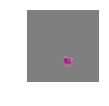

0.3128396597255112


<Figure size 432x288 with 0 Axes>

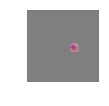

0.04870650906288365


<Figure size 432x288 with 0 Axes>

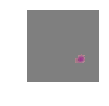

0.02487914154784177


<Figure size 432x288 with 0 Axes>

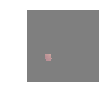

0.16757036188827518


<Figure size 432x288 with 0 Axes>

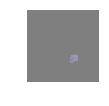

0.0342168599078172


<Figure size 432x288 with 0 Axes>

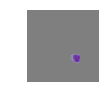

0.11491843868333332


<Figure size 432x288 with 0 Axes>

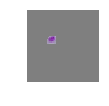

0.03290082476501024


<Figure size 432x288 with 0 Axes>

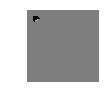

0.26057545829646384


<Figure size 432x288 with 0 Axes>

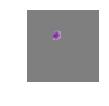

0.011721893995495995


<Figure size 432x288 with 0 Axes>

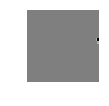

0.039401311075739666


<Figure size 432x288 with 0 Axes>

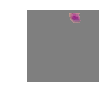

0.03921041956336984


<Figure size 432x288 with 0 Axes>

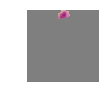

0.0045793976667768636


<Figure size 432x288 with 0 Axes>

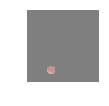

0.020507681852776547


<Figure size 432x288 with 0 Axes>

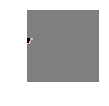

0.016419736848833084


<Figure size 432x288 with 0 Axes>

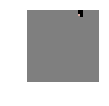

0.145602827814081


<Figure size 432x288 with 0 Axes>

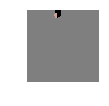

0.042471337065760395


<Figure size 432x288 with 0 Axes>

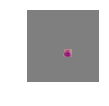

0.023570795860027877


<Figure size 432x288 with 0 Axes>

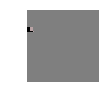

0.1539189389739295


<Figure size 432x288 with 0 Axes>

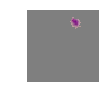

0.018544268727015645


<Figure size 432x288 with 0 Axes>

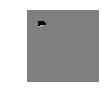

0.03881089986952172


<Figure size 432x288 with 0 Axes>

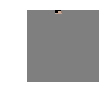

0.031095333630279193


<Figure size 432x288 with 0 Axes>

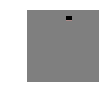

0.03676523726782439


<Figure size 432x288 with 0 Axes>

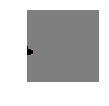

0.02902086081280829


<Figure size 432x288 with 0 Axes>

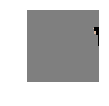

0.08743542649034498


<Figure size 432x288 with 0 Axes>

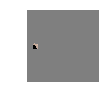

0.08859244968426515


<Figure size 432x288 with 0 Axes>

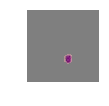

0.12070403399138056


<Figure size 432x288 with 0 Axes>

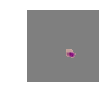

0.06250471753860094


<Figure size 432x288 with 0 Axes>

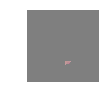

0.03783206828816948


<Figure size 432x288 with 0 Axes>

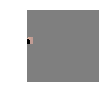

0.056307625746901256


<Figure size 432x288 with 0 Axes>

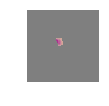

0.07590686611023939


<Figure size 432x288 with 0 Axes>

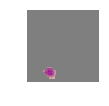

0.010115904960282723


<Figure size 432x288 with 0 Axes>

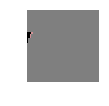

0.025669301374507337


<Figure size 432x288 with 0 Axes>

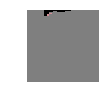

0.11403674791517497


<Figure size 432x288 with 0 Axes>

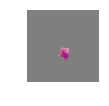

0.16892116735067034


<Figure size 432x288 with 0 Axes>

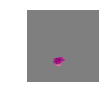

0.2078902375625729


<Figure size 432x288 with 0 Axes>

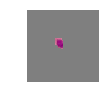

0.11218298858239077


<Figure size 432x288 with 0 Axes>

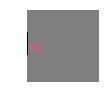

0.09142383824713401


<Figure size 432x288 with 0 Axes>

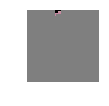

0.2754239444003294


<Figure size 432x288 with 0 Axes>

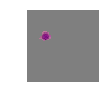

0.042510363014048105


<Figure size 432x288 with 0 Axes>

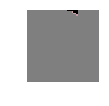

0.10547140572431193


<Figure size 432x288 with 0 Axes>

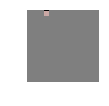

0.026817337148146422


<Figure size 432x288 with 0 Axes>

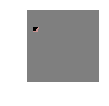

0.04579020953657083


<Figure size 432x288 with 0 Axes>

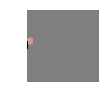

0.22490075557815237


<Figure size 432x288 with 0 Axes>

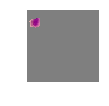

0.07241119598248502


<Figure size 432x288 with 0 Axes>

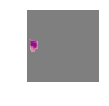

0.09614841494984369


<Figure size 432x288 with 0 Axes>

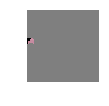

0.07153072668234103


<Figure size 432x288 with 0 Axes>

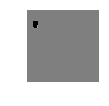

0.06022209830333663


<Figure size 432x288 with 0 Axes>

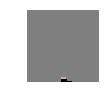

0.030218740186894296


<Figure size 432x288 with 0 Axes>

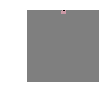

0.01535144201571493


<Figure size 432x288 with 0 Axes>

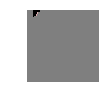

0.029077191462976437


<Figure size 432x288 with 0 Axes>

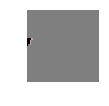

0.03167675657520969


<Figure size 432x288 with 0 Axes>

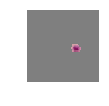

0.14799409313308526


<Figure size 432x288 with 0 Axes>

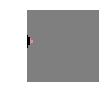

0.02091691691951909


<Figure size 432x288 with 0 Axes>

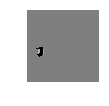

0.22649228691521042


<Figure size 432x288 with 0 Axes>

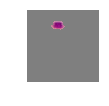

0.03207078186318985


<Figure size 432x288 with 0 Axes>

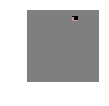

0.04688055361335543


<Figure size 432x288 with 0 Axes>

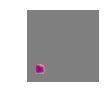

0.29885907000577233


<Figure size 432x288 with 0 Axes>

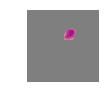

0.03039383169369311


<Figure size 432x288 with 0 Axes>

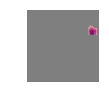

0.08843843850876065


<Figure size 432x288 with 0 Axes>

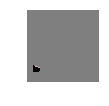

0.13971965763756694


<Figure size 432x288 with 0 Axes>

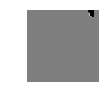

0.04580263243930573


<Figure size 432x288 with 0 Axes>

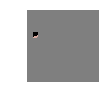

0.04954246931250728


<Figure size 432x288 with 0 Axes>

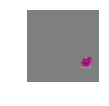

0.03204047708917786


<Figure size 432x288 with 0 Axes>

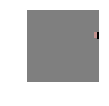

0.026301771402169643


<Figure size 432x288 with 0 Axes>

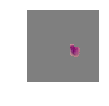

0.08574123821289141


<Figure size 432x288 with 0 Axes>

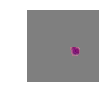

0.015791330242331616


<Figure size 432x288 with 0 Axes>

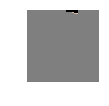

0.1582639067569428


<Figure size 432x288 with 0 Axes>

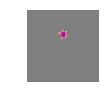

0.04013932094876292


<Figure size 432x288 with 0 Axes>

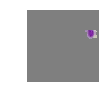

0.034457225239989335


<Figure size 432x288 with 0 Axes>

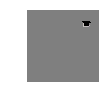

0.12916727894029714


<Figure size 432x288 with 0 Axes>

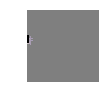

0.015747941952838625


<Figure size 432x288 with 0 Axes>

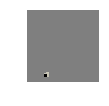

0.03138051510669555


<Figure size 432x288 with 0 Axes>

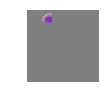

0.07491581852450367


<Figure size 432x288 with 0 Axes>

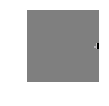

0.048437830155493175


<Figure size 432x288 with 0 Axes>

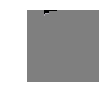

0.3441859204998083


<Figure size 432x288 with 0 Axes>

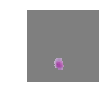

0.12380242788129675


<Figure size 432x288 with 0 Axes>

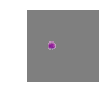

0.10235769337093788


<Figure size 432x288 with 0 Axes>

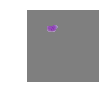

0.37776193077584763


<Figure size 432x288 with 0 Axes>

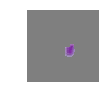

0.24611376572436855


<Figure size 432x288 with 0 Axes>

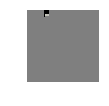

0.04439730101921845


<Figure size 432x288 with 0 Axes>

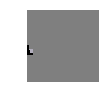

0.04905178676154196


<Figure size 432x288 with 0 Axes>

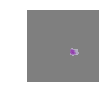

0.26954384125169645


<Figure size 432x288 with 0 Axes>

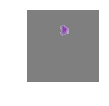

0.23699730505870742


<Figure size 432x288 with 0 Axes>

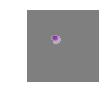

0.088009874378707


<Figure size 432x288 with 0 Axes>

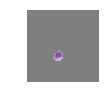

0.03802769298888823


<Figure size 432x288 with 0 Axes>

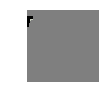

0.012179366214071152


<Figure size 432x288 with 0 Axes>

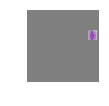

0.24146823762424438


<Figure size 432x288 with 0 Axes>

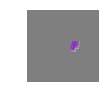

0.2557174170042714


<Figure size 432x288 with 0 Axes>

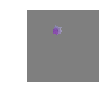

0.17755779674390235


<Figure size 432x288 with 0 Axes>

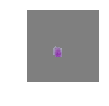

0.44875304700145735


<Figure size 432x288 with 0 Axes>

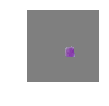

0.2800150500439555


<Figure size 432x288 with 0 Axes>

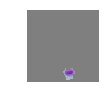

CPU times: user 5min 2s, sys: 3.62 s, total: 5min 6s
Wall time: 4min 24s


In [17]:
%%time
import warnings
warnings.filterwarnings('ignore')
explanation = list()
#felzenszwalb, slic, quickshift,watershed
superpixel_fn ="watershed"

markers=200
compactness=0.01

file = open("./data/lime_erg/"+data_type+"/"+timestamp+"/config","a")

file.write("\n")
file.write("Name of super pixel function: %s\n" %superpixel_fn)
file.write("Number of Markers: %d\n" %markers)
file.write("Compactness: %f\n"%compactness)
file.close()



for image in images:
    explanation.append(explainer.explain_instance(image,
                                                  my_model.predict,
                                                  num_samples=num_samples_to_learn,
                                                  markers_v=markers,
                                                  compactness_ws=compactness,
                                                  segmentation_fn=superpixel_fn
                                                 ))



plt.clf()
for i in range(len(explanation)):
    label = getHighestID(preds[i])   
    max_value = 0
    for y in explanation[i].local_exp[label]:
        if y[1] > max_value:
            max_value=y[1]
    print(max_value)
    temp, mask = explanation[i].get_image_and_mask(label,
                                               positive_only=positive_only_boolean,
                                               hide_rest=hide_rest_boolean,
                                               min_weight=max_value*threshhold,
                                               num_features=nb_features)
    plt.figure()
    ws_colored = getColorForWS(temp,images[i])
    data = mark_boundaries(ws_colored / 2 +0.5, mask,color=(0.5,0.5,0.5))    
    FILENAME = "data/lime_erg/{}/{}/{}/{}.png".format(data_type,timestamp,image_names[i],superpixel_fn)   
    make_image(data,FILENAME) 
    plt.show()